In [1]:
import pandas as pd
import bs4
import re
import requests
from bs4 import BeautifulSoup
import pdb

In [2]:
# Get live usd exchange rate

def GbpToUsd() :
    url = 'https://transferwise.com/in/currency-converter/gbp-to-usd-rate'
    req = requests.get(url)
    soup = BeautifulSoup(req.content, 'html5lib')
    test = soup.find_all("input",{"class" : 'js-TargetAmount form-control cc-calculator__input'})
    rate = test[0]["value"]
    return(rate)

In [3]:
# clean and convert price into doller
usd_rate = GbpToUsd()

def price_con(price) :
    price = re.sub('£','',price)                            
    price = float(price) * float(usd_rate)                         # try to get live conersion price
    price = round(price,3)                             # truncate upto three decimal point      
    return(price)

# convert string ratings to int value
def rating_con(rate) :
    if rate == 'One' :
        int_rate = 1
    elif rate == 'Two' :
        int_rate = 2 
    elif rate == 'Three' :
        int_rate = 3
    elif rate ==  'Four' :
        int_rate = 4
    elif rate == 'Five' :
        int_rate = 5
    return(int_rate)

In [4]:
# Declear lists
page_urls = []
image_urls = []
titles = []
prices = []
rating = []

page_to_scrape = 5

In [5]:
for i in range(1, page_to_scrape+1) :
    url = ('http://books.toscrape.com/catalogue/page-{}.html').format(i)
    page_urls.append(url)
    req = requests.get(url)
    soup = BeautifulSoup(req.content,'html5lib')
    
    for price in soup.find_all("p",{"class":"price_color"}) :
        p = price.getText()
        p = price_con(p)   # to convert price to doller value
        prices.append(p)
        
    for Rating in soup.findAll('p',{'class' : 'star-rating'}) :
        for k,v in Rating.attrs.items() :
            r = v[1]
            r = rating_con(r)
            rating.append(r)
    divs = soup.findAll("div",{"class" : "image_container"})
        
    for div in divs :
        img_tag = div.find('img',{"class" : "thumbnail"})
        src_val = img_tag['src']
        url = 'http://books.toscrape.com/' + str(img_tag['src'])
        
        new_url = url.replace("../","")
        image_urls.append(new_url)
        ttle = img_tag['alt']
        titles.append(ttle)
    

In [17]:
data = {'TItle' : titles,'Prices' : prices,'Rating' : rating,'Image_urls' : image_urls}
page_link = {'Page_urls' : page_urls}
page_url_df = pd.DataFrame(page_link)
dataframe = pd.DataFrame(data)
dataframe.index = dataframe.index+1  # Incrementing index to start indexing from zero

In [18]:
dataframe.head(50)

,TItle,Prices,Rating,Image_urls
1,A Light in the Attic,66.325,3,http://books.toscrape.com/media/cache/2c/da/2c...
2,Tipping the Velvet,68.849,1,http://books.toscrape.com/media/cache/26/0c/26...
3,Soumission,64.186,1,http://books.toscrape.com/media/cache/3e/ef/3e...
4,Sharp Objects,61.265,4,http://books.toscrape.com/media/cache/32/51/32...
5,Sapiens: A Brief History of Humankind,69.477,5,http://books.toscrape.com/media/cache/be/a5/be...
6,The Requiem Red,29.018,1,http://books.toscrape.com/media/cache/68/33/68...
7,The Dirty Little Secrets of Getting Your Dream...,42.714,4,http://books.toscrape.com/media/cache/92/27/92...
8,The Coming Woman: A Novel Based on the Life of...,22.971,3,http://books.toscrape.com/media/cache/3d/54/3d...
9,The Boys in the Boat: Nine Americans and Their...,28.954,4,http://books.toscrape.com/media/cache/66/88/66...
10,The Black Maria,66.812,1,http://books.toscrape.com/media/cache/58/46/58...


In [19]:
page_url_df.head()

,Page_urls
0,http://books.toscrape.com/catalogue/page-1.html
1,http://books.toscrape.com/catalogue/page-2.html
2,http://books.toscrape.com/catalogue/page-3.html
3,http://books.toscrape.com/catalogue/page-4.html
4,http://books.toscrape.com/catalogue/page-5.html


# HISTOGRAM    Distrubutuon of Price 

In [10]:
from matplotlib import pyplot as plt

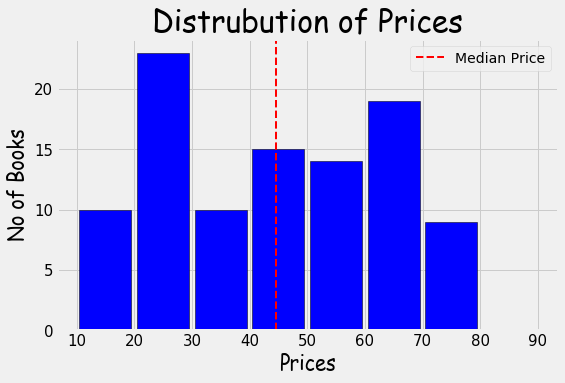

In [11]:
plt.style.use('fivethirtyeight')

bins = range(10,100,10)

plt.figure(figsize = (8, 5))
plt.hist(dataframe.Prices, bins = bins, color = 'blue', edgecolor = 'Black', log = False,  rwidth = 0.9)

plt.xticks(bins, fontsize = 15)
plt.yticks(fontsize = 15)

plt.title('Distrubution of Prices', fontdict = {'fontname' : 'Comic Sans MS', 'fontsize' : 30})
plt.xlabel('Prices', fontdict = {'fontname' : 'Comic Sans MS', 'fontsize': 20})
plt.ylabel('No of Books', fontdict = {'fontname' : 'Comic Sans MS', 'fontsize' : 20})

median_price = dataframe.Prices.median()

# Draw grid
#plt.grid(axis = 'y')

# draw a axis verticle line through median
plt.axvline(median_price, color = 'r', label = 'Median Price', linestyle = '--', linewidth = 2)
plt.legend()

plt.show()

# Distrubution of rating

In [ ]:
plt.style.use('fivethirtyeight')

bins = range(1,6,1)
plt.hist(dataframe.Rating, bins = bins, color = 'green', edgecolor = 'r', rwidth = 0.9, log = False )

plt.xticks(bins, fontsize = 15)
plt.yticks(fontsize = 15)

plt.xlabel('Readers Rating', fontdict = {'fontsize' : 20})
plt.ylabel('No of Books', fontdict = {'fontsize' : 20})
plt.title('Distrubution of Rating', fontsize = 30)

plt.show()

In [ ]:
#dataframe.to_excel('books_data_final.xlsx')
# plot price vs rating
plt.figure(figsize = (24,15))
bins = [1,2,3,4,5]
test = range(0,85,5)

plt.scatter(dataframe.Rating, dataframe.Prices,color = 'g', alpha = 0.6)
plt.xlabel('User Rating')
plt.xticks(bins)
plt.ylabel('Price')
plt.yticks(test)
plt.show()

In [ ]:
# same prices books are reated as 1 ,2, and 3 star
# count no of books rated as 1 2 or 3 star

In [ ]:
d = dataframe.sort_values(by = 'Rating')
d.head(20)